In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

In [89]:
df_independent = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/09_ComparingTwoMeans/Data_Files/SpiderLong.dat', sep='\t')
df_independent.head()

,Group,Anxiety
0,Picture,30
1,Picture,35
2,Picture,45
3,Picture,40
4,Picture,50


### Barplot with independent measure design


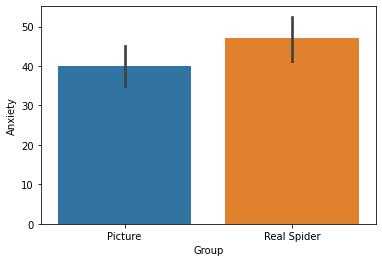

In [90]:
_ = sns.barplot(x="Group", y="Anxiety", data=df_independent)

In [91]:
df_dependent = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/09_ComparingTwoMeans/Data_Files/SpiderWide.dat', sep='\t')
df_dependent.head()

,picture,real
0,30,40
1,35,35
2,45,50
3,40,55
4,50,65


In [92]:
df_dependent['mean'] = (df_dependent['picture'] + df_dependent['real'])/2

In [93]:
grand_mean = (df_dependent['picture'].mean() + df_dependent['real'].mean())/2
print(grand_mean)

43.5


In [94]:
df_dependent['adj'] = grand_mean - df_dependent['mean']

In [95]:
df_dependent['picture_adj'] = df_dependent['picture'] + df_dependent['adj']
df_dependent['real_adj'] = df_dependent['real'] + df_dependent['adj']

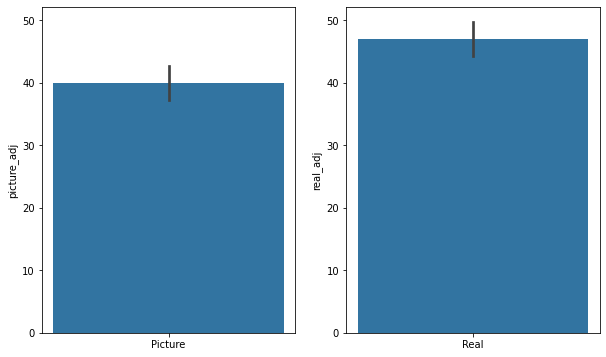

In [96]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,2,1)
_ = sns.barplot(x = ["Picture" for i in range(len(df_dependent))], y = df_dependent['picture_adj'])
ax2 = plt.subplot(1,2,2, sharey = ax1)
_ = sns.barplot(x = ['Real' for i in range(len(df_dependent))], y = df_dependent['real_adj'])

### we can see the errorbar is less in this barplot in comparison to the barplot generated by independent measure design .

# Doing T-tests

## i) Independent t-test

In [97]:
df_independent.head(5)

,Group,Anxiety
0,Picture,30
1,Picture,35
2,Picture,45
3,Picture,40
4,Picture,50


In [98]:
df_independent.tail(5)

,Group,Anxiety
19,Real Spider,35
20,Real Spider,30
21,Real Spider,50
22,Real Spider,60
23,Real Spider,39


In [99]:
data_picture = df_independent[df_independent['Group'] == "Picture"]
data_real    = df_independent[df_independent['Group'] != "Picture"]

In [100]:
st.ttest_ind(data_picture['Anxiety'], data_real['Anxiety'],equal_var = False)  # welch t-test

Ttest_indResult(statistic=-1.681345614953415, pvalue=0.10724404654267576)

In [101]:
st.ttest_ind(data_picture['Anxiety'], data_real['Anxiety'],equal_var = True)

Ttest_indResult(statistic=-1.681345614953415, pvalue=0.10683919238259681)

#### don't show any significant difference

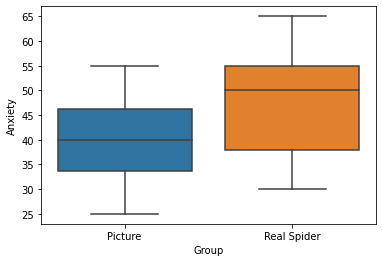

In [102]:
_ = sns.boxplot(x="Group", y="Anxiety", data=df_independent)

### i) a) Robust method to compare independent means, i.e non-parametric alternatives

In [103]:
st.ranksums(data_picture['Anxiety'], data_real['Anxiety'])

RanksumsResult(statistic=-1.5011106998930268, pvalue=0.13332693177434943)

In [104]:
st.mannwhitneyu(data_picture['Anxiety'], data_real['Anxiety'])

MannwhitneyuResult(statistic=46.0, pvalue=0.06861291715394628)

### calculating the effect size , r = sqrt(t^2/(t^2+dOf))

In [105]:
t,p = st.ttest_ind(data_picture['Anxiety'], data_real['Anxiety'])
t

-1.681345614953415

In [106]:
dOf = (12-1) + (12-1)
dOf

22

In [107]:
r = np.sqrt(t**2 / (t**2 + dOf))
r

0.337439210464791

#### which is a medium effect size, so even the effect(i.e of differnece b/w anxiety compared in both cases were non-significant , it still represented a substantial effect.

## ii) Dependent/Paired t-test

In [108]:
df_dependent.head()

,picture,real,mean,adj,picture_adj,real_adj
0,30,40,35.0,8.5,38.5,48.5
1,35,35,35.0,8.5,43.5,43.5
2,45,50,47.5,-4.0,41.0,46.0
3,40,55,47.5,-4.0,36.0,51.0
4,50,65,57.5,-14.0,36.0,51.0


In [109]:
t, p = st.ttest_rel(df_dependent['real'], df_dependent['picture'])
print(f'statistic = {t}, pvalue = {p}')

statistic = 2.472533427497901, pvalue = 0.030981783136040896


In [110]:
(df_dependent['real'] - df_dependent['picture']).describe()

count    12.000000
mean      7.000000
std       9.807233
min     -11.000000
25%       0.000000
50%       7.500000
75%      15.000000
max      20.000000
dtype: float64

### by hand

In [111]:
se = 9.807233/np.sqrt(12)

In [112]:
t = (df_dependent['real'] - df_dependent['picture']).mean()/se
t

2.4725334154867413

In [113]:
# confidence Interval, with help of t-table
ci_lower = (df_dependent['real'] - df_dependent['picture']).mean() - 2.179*se
ci_upper = (df_dependent['real'] - df_dependent['picture']).mean() + 2.179*se
(ci_lower, ci_upper)

(0.8310237166209129, 13.168976283379088)

#### shows that based on this t-test there is a significant difference (because the confidence interval does not cross zero and p is less than .05) in anxiety scores across the two spider groups, it also shows how paired t-test has more power as we had learned earlier. 

### ii) a) Robust methods to compare dependent/paired means

In [114]:
st.wilcoxon(df_dependent['real'], df_dependent['picture'], correction=False)

WilcoxonResult(statistic=8.0, pvalue=0.045855524379089546)

### Calculating the effect size

In [115]:
dOf_paired = 12 -1
t = (df_dependent['real'] - df_dependent['picture']).mean()/se

In [116]:
r_paired = np.sqrt(t**2 / (t**2 + dOf_paired))
r_paired

0.597686912521715

#### effect size of this magnitude represents a very large effect (it is above .5, the threshold for a large effect). Therefore, as well as being statistically significant, this effect is large and probably substantive finding.